              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.159457      0.881386     0.834421
sepal width      -0.159457     1.000000     -0.303421    -0.277511
petal length      0.881386    -0.303421      1.000000     0.936003
petal width       0.834421    -0.277511      0.936003     1.000000
              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.072112      0.717624     0.654960
sepal width      -0.072112     1.000000     -0.182391    -0.146988
petal length      0.717624    -0.182391      1.000000     0.803014
petal width       0.654960    -0.146988      0.803014     1.000000


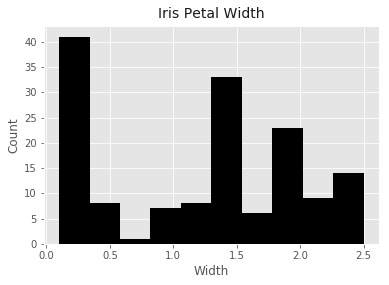

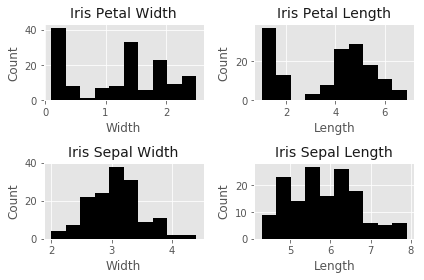

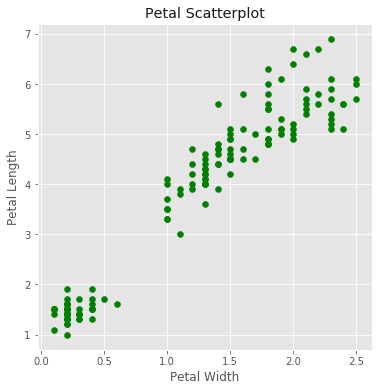

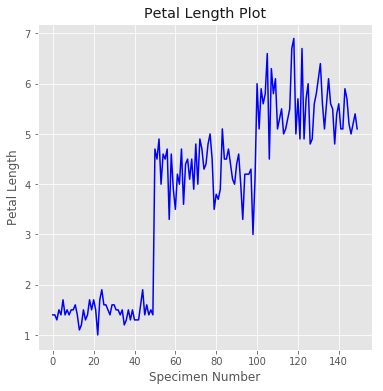

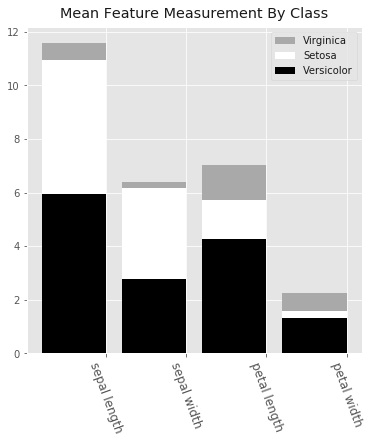

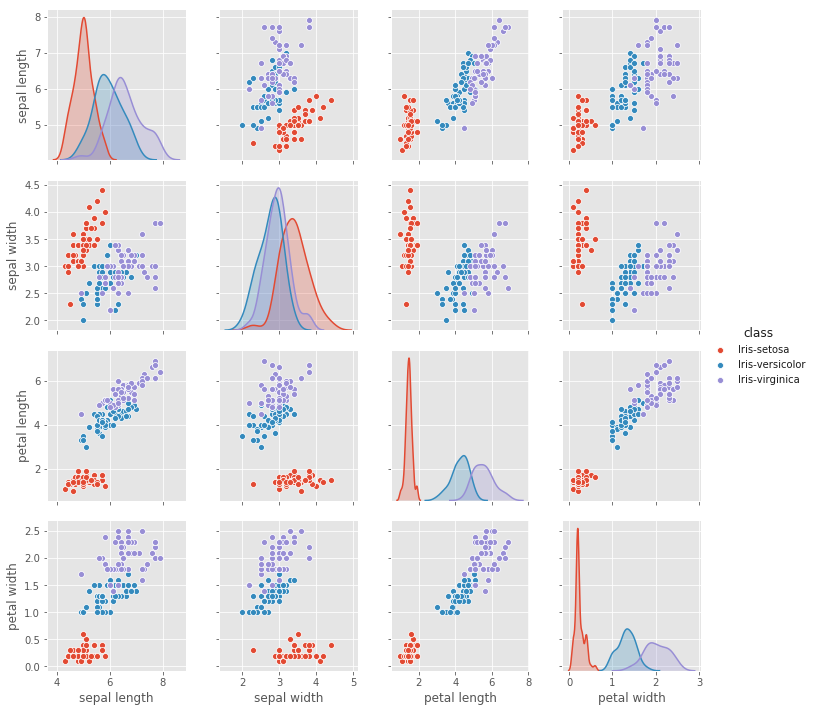

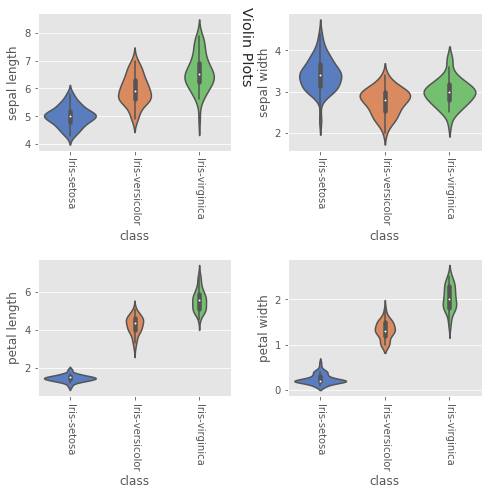

In [2]:
import os
import pandas as pd
import requests

PATH = r'/data/src/iris/'
# r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
# r = requests.get('https://github.com/will09/src/blob/master/iris/iris.data')
#with open(PATH + 'iris.data', 'w') as f:
#  f.write(r.text)

os.chdir(PATH)

df = pd.read_csv(PATH + 'iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

print (df.corr(method="spearman"))
print (df.corr(method="kendall"))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'], color='black');
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

fig, ax = plt.subplots(2,2, figsize=(6,4))

ax[0][0].hist(df['petal width'], color='black');
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)

ax[0][1].hist(df['petal length'], color='black');
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Length', fontsize=12)
ax[0][1].set_title('Iris Petal Length', fontsize=14, y=1.01)

ax[1][0].hist(df['sepal width'], color='black');
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)

ax[1][1].hist(df['sepal length'], color='black');
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)

plt.tight_layout()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'], df['petal length'], color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['petal length'], color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

fig, ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica', 'Setosa', 'Versicolor'])

import seaborn as sns
sns.pairplot(df, hue="class")

fig, ax = plt.subplots(2, 2, figsize=(7,7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', rotation=-90)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()




In [7]:
df['class'] = df['class'].map({'Iris-setosa': 'SET', 'Iris-virginica': 'VIR', 'Iris-versicolor': 'VER'})
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET
5,5.4,3.9,1.7,0.4,SET
6,4.6,3.4,1.4,0.3,SET
7,5.0,3.4,1.5,0.2,SET
8,4.4,2.9,1.4,0.2,SET
9,4.9,3.1,1.5,0.1,SET


In [10]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >=1.3 else 0)
df

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0
5,5.4,3.9,1.7,0.4,SET,0
6,4.6,3.4,1.4,0.3,SET,0
7,5.0,3.4,1.5,0.2,SET,0
8,4.4,2.9,1.4,0.2,SET,0
9,4.9,3.1,1.5,0.1,SET,0


In [13]:
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'], axis=1)
df

,sepal length,sepal width,petal length,petal width,class,petal area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,0.15


In [14]:
df.applymap(lambda v: np.log(v) if isinstance(v, float) else v)

,sepal length,sepal width,petal length,petal width,class,petal area
0,1.629241,1.252763,0.336472,-1.609438,Iris-setosa,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,Iris-setosa,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,Iris-setosa,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,Iris-setosa,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,Iris-setosa,-1.272966
5,1.686399,1.360977,0.530628,-0.916291,Iris-setosa,-0.385662
6,1.526056,1.223775,0.336472,-1.203973,Iris-setosa,-0.867501
7,1.609438,1.223775,0.405465,-1.609438,Iris-setosa,-1.203973
8,1.481605,1.064711,0.336472,-1.609438,Iris-setosa,-1.272966
9,1.589235,1.131402,0.405465,-2.302585,Iris-setosa,-1.897120


In [15]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,petal area
class,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.3628
Iris-versicolor,5.936,2.770,4.260,1.326,5.7204
Iris-virginica,6.588,2.974,5.552,2.026,11.2962


In [16]:
df.groupby('class').describe()

petal area                                                  \
                     count     mean       std   min     25%     50%    75%   
class                                                                        
Iris-setosa           50.0   0.3628  0.183248  0.11  0.2650   0.300   0.42   
Iris-versicolor       50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   
Iris-virginica        50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79   

                       petal length        ...  sepal length      sepal width  \
                   max        count   mean ...           75%  max       count   
class                                      ...                                  
Iris-setosa       0.96         50.0  1.464 ...           5.2  5.8        50.0   
Iris-versicolor   8.64         50.0  4.260 ...           6.3  7.0        50.0   
Iris-virginica   15.87         50.0  5.552 ...           6.9  7.9        50.0   

                                                               
                  mean       std  min    25%  50%    75%  max  
class                                                          
Iris-setosa      3.418  0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
Iris-virginica   2.974  0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 40 columns]

In [17]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[Iris-setosa]
0.2,[Iris-setosa]
0.3,[Iris-setosa]
0.4,[Iris-setosa]
0.5,[Iris-setosa]
0.6,[Iris-setosa]
1.0,[Iris-versicolor]
1.1,[Iris-versicolor]
1.2,[Iris-versicolor]


In [18]:
df.groupby('class')['petal width'].agg({'delta': lambda x: x.max() - x.min(), 'max': np.max, 'min': np.min})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,max,min,delta
class,,,
Iris-setosa,0.6,0.1,0.5
Iris-versicolor,1.8,1.0,0.8
Iris-virginica,2.5,1.4,1.1


Text(0.5,1.02,'Setosa Sepal Width vs. Sepal Length')

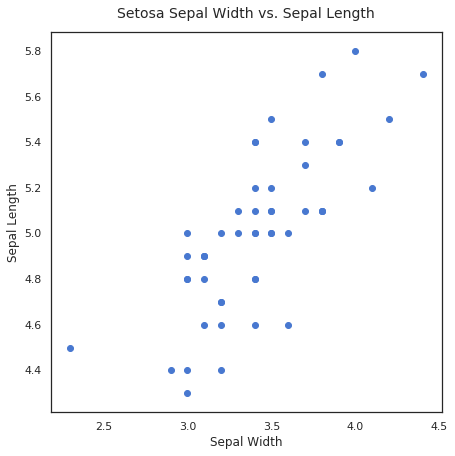

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)

In [21]:
import statsmodels.api as sm

y = df['sepal length'][:50]
x = df['sepal width'][:50]
x = sm.add_constant(x)

results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           4.75e-10
Time:                        16:30:22   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

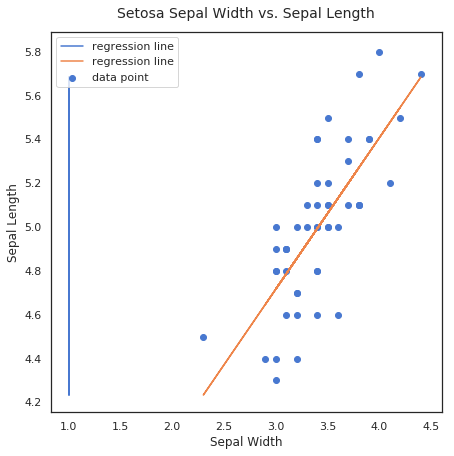

In [56]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(df['sepal width'][:50], df['sepal length'][:50], label='data point')
#ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)
#???????????????????????

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

clf = RandomForestClassifier(max_depth=5, n_estimators=10)

x = df.ix[:,:4]
y = df.ix[:,4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-setosa,Iris-setosa,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-virginica,Iris-virginica,1
4,Iris-versicolor,Iris-versicolor,1
5,Iris-setosa,Iris-setosa,1
6,Iris-setosa,Iris-setosa,1
7,Iris-versicolor,Iris-versicolor,1
8,Iris-setosa,Iris-setosa,1
9,Iris-versicolor,Iris-virginica,0
